Details of many rSTAN examples:
http://hedibert.org/wp-content/uploads/2021/02/stan-rstan-examples.html

In [1]:
%load_ext cmdstanjupyter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as ar
import scipy.stats

# Regression Test (WORKS LIKE A CHARM !!!)

In [5]:
n = 50
p = 5

In [6]:
# generating the covariate matrix

X_data = np.random.normal(loc = 1, scale = 5, size = (n, p))
X_data = np.array([np.append(1.0, a) for a in X_data])
X_data[:5]

array([[  1.        ,  -7.32867928,   1.85401881,   1.8945266 ,
        -10.82272135,  -4.93473427],
       [  1.        ,  -1.3679623 ,   8.98085018,  -8.98390296,
          5.34632386,  -7.67380402],
       [  1.        ,   2.33494581,   8.13883042,  -3.75062073,
          3.12849496,   5.62941858],
       [  1.        ,  -7.25119238,   4.14285566,   2.666821  ,
         -2.77208277,  -9.21832069],
       [  1.        ,  -1.24786353,  -0.64950101,   6.75178248,
         -5.07078229,   1.67729212]])

In [7]:
#checking whether the columns are corrleted too much

np.corrcoef(X_data.transpose())

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[        nan,         nan,         nan,         nan,         nan,
                nan],
       [        nan,  1.        , -0.09535166, -0.20416101,  0.11554129,
         0.04933109],
       [        nan, -0.09535166,  1.        , -0.25322514,  0.08822333,
        -0.00649013],
       [        nan, -0.20416101, -0.25322514,  1.        , -0.02757833,
        -0.14596156],
       [        nan,  0.11554129,  0.08822333, -0.02757833,  1.        ,
         0.12689892],
       [        nan,  0.04933109, -0.00649013, -0.14596156,  0.12689892,
         1.        ]])

In [8]:
# true co-efficient vector

beta_0 = np.array([-10, 1, 2, 3, 4, 5])
beta_0

array([-10,   1,   2,   3,   4,   5])

In [9]:
# data generation

Y_data = np.dot(X_data, beta_0) + np.random.normal(size = n)
Y_data

array([-77.17163249, -37.73865251,  38.736706  , -57.80837298,
        -4.92404553, -44.91176898, -23.93387612, -36.20260411,
        41.03585046,  22.151874  , -61.68713331,  17.79165168,
       -61.65662733,  18.54223392,  17.84400211,  31.6672342 ,
         9.16276066,  65.3382678 ,  53.96944363,  -1.09917524,
        40.01152241,  29.59094438,  16.80609163,  44.30415783,
        43.60301831, -46.24410128, -20.35799425,  72.67194201,
        60.85672975,  34.74167044,  -5.31293961, -29.9949698 ,
        93.99868809, -27.80964225,  21.41996249,  -0.54805948,
       -23.82885544, -32.42847476,  10.89883897,  31.80382828,
       -13.98722871,   6.6411482 ,  -9.43518703,  14.96866569,
        19.74973567, -30.93558816, -41.38063952,  36.26326358,
         2.88066524, 106.15480763])

In [10]:
reg_code = """

data {
  int<lower=0> n;
  int<lower=0> p;
  vector[n] Y;
  matrix[n, p] X;
}

parameters {
  vector[p] beta;
}

model {
  beta ~ normal(0, 1);
  Y ~ normal(X*beta, 1);
}

"""

In [11]:
reg_data = {"n":n, "p":p + 1, "X":X_data, "Y":Y_data}

In [14]:
# posterior = stan.build(reg_code, data = reg_data)
posterior = stan(model_code = reg_code, data = reg_data)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_583a05b390409b2b6b7b273415b94e6d NOW.


CompileError: command 'C:\\Program Files (x86)\\Microsoft Visual Studio\\2022\\BuildTools\\VC\\Tools\\MSVC\\14.33.31629\\bin\\HostX86\\x64\\cl.exe' failed with exit code 2

In [ ]:
fit = posterior.sample(num_chains=5, num_samples=1000)

Sampling:   0%
Sampling:  20% (2000/10000)
Sampling:  40% (4000/10000)
Sampling:  60% (6000/10000)
Sampling:  80% (8000/10000)
Sampling: 100% (10000/10000)
Sampling: 100% (10000/10000), done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would ta

In [ ]:
df = fit.to_frame()
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta.1,beta.2,beta.3,beta.4,beta.5,beta.6
draws,,,,,,,,,,,,,
0,-102.969506,0.932795,0.603434,3.0,7.0,0.0,104.605456,-9.706376,0.965620,2.011965,3.060676,4.052343,5.037808
1,-104.216445,0.931299,0.619601,3.0,7.0,0.0,107.076732,-10.052759,0.991093,2.054547,3.070310,4.025172,5.022056
2,-107.565699,0.735520,0.649646,2.0,3.0,0.0,109.930898,-9.292443,1.002127,2.022151,2.938131,4.015831,4.952302
3,-103.032703,0.973309,0.744389,3.0,7.0,0.0,104.313719,-9.844013,0.990154,1.988708,2.923924,4.014658,4.984265
4,-102.903448,1.000000,0.666052,3.0,7.0,0.0,104.730031,-9.668359,0.960167,1.985335,3.006852,3.979660,4.952969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-101.283813,0.878026,0.603434,3.0,7.0,0.0,105.222038,-9.744898,0.993478,1.996139,2.984600,4.033972,5.060386
4996,-102.892079,0.913142,0.619601,3.0,7.0,0.0,104.493801,-9.673907,0.982170,1.985971,3.043943,4.049759,4.988302
4997,-101.507819,0.877954,0.649646,3.0,7.0,0.0,103.457136,-10.001952,0.987194,2.029892,2.998843,4.033798,5.055741


In [ ]:
# burning samples

df_beta = df[df.columns[-6:]]
df_beta = df_beta.iloc[-1000:]
df_beta

parameters,beta.1,beta.2,beta.3,beta.4,beta.5,beta.6
draws,,,,,,
4000,-9.807157,0.971576,1.989805,2.990404,4.021370,5.040206
4001,-9.690968,0.985821,2.063819,3.016354,3.992425,4.994940
4002,-9.567211,0.972159,2.019149,2.988985,3.999097,4.998583
4003,-9.749594,0.953980,2.060468,2.987697,4.004415,4.984136
4004,-9.695347,1.020115,2.048318,2.975951,4.006878,4.981366
...,...,...,...,...,...,...
4995,-9.744898,0.993478,1.996139,2.984600,4.033972,5.060386
4996,-9.673907,0.982170,1.985971,3.043943,4.049759,4.988302
4997,-10.001952,0.987194,2.029892,2.998843,4.033798,5.055741


In [ ]:
# function to find mode

def mode_finder(arr):
  hist = np.histogram(arr)
  return(hist[1][np.argmax(hist[0])])

In [ ]:
df_beta.apply(np.median, axis = 0)

parameters
beta.1   -9.744556
beta.2    0.979981
beta.3    2.017147
beta.4    2.994430
beta.5    4.017911
beta.6    5.013738
dtype: float64

In [ ]:
df_beta.apply(mode_finder, axis = 0)

parameters
beta.1   -9.761671
beta.2    0.961971
beta.3    1.995982
beta.4    2.978751
beta.5    3.998287
beta.6    5.006494
dtype: float64

(array([  1.,   4.,  12.,  38.,  58., 107., 152., 166., 160., 162.,  71.,
         41.,  22.,   5.,   1.]),
 array([-10.27575005, -10.20720615, -10.13866225, -10.07011835,
        -10.00157445,  -9.93303055,  -9.86448666,  -9.79594276,
         -9.72739886,  -9.65885496,  -9.59031106,  -9.52176716,
         -9.45322326,  -9.38467936,  -9.31613546,  -9.24759156]),
 <a list of 15 Patch objects>)

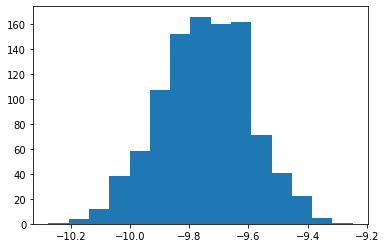

In [ ]:
plt.hist(df_beta['beta.1'], bins = 15)

(array([  7.,  19.,  46.,  78., 117., 139., 152., 135., 121., 104.,  53.,
         21.,   6.,   1.,   1.]),
 array([4.93330387, 4.94550225, 4.95770064, 4.96989902, 4.98209741,
        4.99429579, 5.00649418, 5.01869256, 5.03089095, 5.04308933,
        5.05528772, 5.0674861 , 5.07968449, 5.09188287, 5.10408126,
        5.11627964]),
 <a list of 15 Patch objects>)

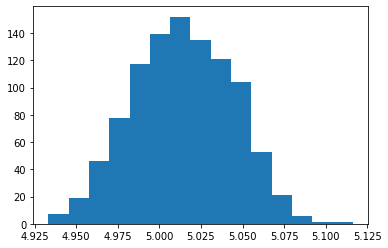

In [ ]:
plt.hist(df_beta['beta.6'], bins = 15)

In [ ]:
ar.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],-9.746,0.156,-10.045,-9.461,0.002,0.001,6006.0,3874.0,1.0
beta[1],0.980,0.029,0.924,1.031,0.000,0.000,5910.0,4389.0,1.0
beta[2],2.018,0.037,1.948,2.085,0.000,0.000,6099.0,3759.0,1.0
beta[3],2.995,0.033,2.933,3.058,0.000,0.000,5659.0,4186.0,1.0
beta[4],4.018,0.027,3.965,4.068,0.000,0.000,6331.0,4014.0,1.0
beta[5],5.014,0.030,4.956,5.067,0.000,0.000,6089.0,4372.0,1.0


In [ ]:
reg2_code = """

functions{
  real mynorm_lpdf(vector eta){
    return -0.5 * eta' * eta;
  }
}

data {
  int<lower=0> n;
  int<lower=0> p;
  vector[n] Y;
  matrix[n, p] X;
}

parameters {
  vector[p] beta;
}

model {
  beta ~ mynorm();
  Y ~ normal(X*beta, 1);
}

"""

In [ ]:
posterior = stan.build(reg2_code, data = reg_data)
fit = posterior.sample(num_chains=5, num_samples=1000)
df = fit.to_frame()

Building...

CRITICAL:httpstan:Exception while building model extension module: `CompileError(DistutilsExecError("command 'x86_64-linux-gnu-gcc' terminated by signal 2"))`, traceback: `['  File "/usr/local/lib/python3.7/dist-packages/httpstan/views.py", line 114, in handle_create_model\n    compiler_output = await httpstan.models.build_services_extension_module(program_code)\n', '  File "/usr/local/lib/python3.7/dist-packages/httpstan/models.py", line 169, in build_services_extension_module\n    None, httpstan.build_ext.run_build_ext, extensions, build_lib\n', '  File "/usr/lib/python3.7/asyncio/futures.py", line 263, in __await__\n    yield self  # This tells Task to wait for completion.\n', '  File "/usr/lib/python3.7/asyncio/tasks.py", line 318, in __wakeup\n    future.result()\n', '  File "/usr/lib/python3.7/asyncio/futures.py", line 181, in result\n    raise self._exception\n', '  File "/usr/lib/python3.7/concurrent/futures/thread.py", line 57, in run\n    result = self.fn(*self.args, **self.k

AttributeError: ignored

In [ ]:
# burning samples

df_beta = df[df.columns[-6:]]
df_beta = df_beta.iloc[-1000:]
df_beta

In [ ]:
norm_data = np.random.normal(loc = 5, scale = .1, size = 100)
norm_data = {"N": 100, "X": norm_data}
norm_data

{'N': 100,
 'X': array([4.84462163, 4.96551599, 4.90837713, 4.97550926, 5.01408849,
        4.90174901, 4.909719  , 5.09816809, 4.96417418, 4.92436342,
        4.8366364 , 4.96479655, 4.96859004, 4.92107889, 5.08907515,
        4.93139403, 5.00062546, 4.9909437 , 4.84901507, 5.04306619,
        4.8570524 , 5.17526376, 5.00717037, 5.00287574, 5.02651414,
        5.08685491, 5.21137953, 4.95852898, 5.06160135, 5.06505077,
        4.89282169, 5.0496997 , 4.97555542, 5.13305462, 5.04823819,
        5.06304727, 5.14324516, 5.14140985, 5.07514335, 5.06831008,
        4.92497798, 5.02864829, 4.98682061, 5.12333344, 4.86620787,
        5.01205977, 5.01362481, 5.05078747, 5.02330901, 4.85558866,
        5.1670494 , 4.91888771, 4.93262314, 4.86101611, 5.01384637,
        5.05304935, 4.95092555, 4.84318454, 4.87607329, 4.9388907 ,
        4.9087547 , 5.13111681, 4.93035685, 4.99245809, 5.1618048 ,
        5.20896906, 5.02261009, 4.93187838, 5.0015804 , 4.98552464,
        4.91037768, 4.9076356 , 

In [ ]:
test_code = """

functions {
  real my_std_normal_lpdf(vector y) {
    return -0.5*y'*y;
  }
}

data {
  int<lower = 0> N;
  vector[N] X;
}

parameters {
  vector[N] y;
}
model {
  y ~ my_std_normal();
  X ~ normal(y, 1);
}

"""

In [ ]:
posterior = stan.build(test_code, data = norm_data)

Building...



Building: found in cache, done.

In [ ]:
fit = posterior.sample(num_chains=5, num_samples=1000)
df = fit.to_frame()

Sampling:   0%
Sampling:  20% (2000/10000)
Sampling:  40% (4000/10000)
Sampling:  60% (6000/10000)
Sampling:  80% (8000/10000)
Sampling: 100% (10000/10000)
Sampling: 100% (10000/10000), done.
Messages received during sampling:
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would ta

In [ ]:
df.apply(np.median, axis = 0)

parameters
lp__            -673.585428
accept_stat__      0.900018
stepsize__         0.421037
treedepth__        3.000000
n_leapfrog__       7.000000
                    ...    
y.96               2.452962
y.97               2.548928
y.98               2.472325
y.99               2.524001
y.100              2.517737
Length: 107, dtype: float64

# Testing vectorization of distributions in STAN (WORKS LIKE A CHARM !!!)

For $i \in 1 \dots n$, $\quad$ $Y_i \sim \mbox{Poisson} \left( \lambda_i \right)$, $\;$ $\lambda_i \overset{i.i.d}{\sim} \mbox{Gamma} \left( a, b \right)$

Posterior: $\quad$ $\lambda_i \Big| Y_{1:n} \overset{ind}{\sim} \mbox{Gamma} \left( a + Y_i, b + 1 \right)$

In [ ]:
a = 1; b = 1; n = 100

In [ ]:
Y = np.floor(np.random.gamma(shape = 2, scale = 2, size = n))
Y = np.array([int(v) for v in Y])
Y

array([ 4,  3,  1,  5,  0,  5,  2,  2,  4,  2,  1,  8,  2,  2,  5,  2,  0,
        3,  2,  2,  2,  0,  2,  5,  7,  2,  3,  5,  4,  2,  2,  3,  6,  1,
       10,  2,  7,  0,  4,  5,  5,  0,  3,  1,  3,  6,  4,  4,  2,  1,  0,
        3,  7,  2,  6,  7,  0,  2,  4,  8,  5,  1,  6,  5,  1,  2,  2,  2,
        1,  1,  2,  1,  1,  0,  5,  9,  4,  1,  6,  1,  5,  6,  2,  3,  4,
        1,  1,  3,  1,  4,  0,  4,  4,  5,  6,  3,  8,  6,  2,  2])

(array([ 9., 16., 24., 10., 12., 12.,  8.,  4.,  3.,  2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

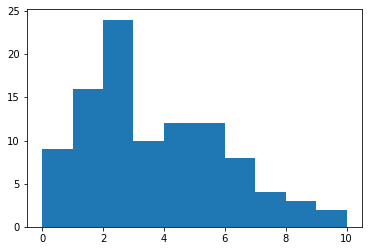

In [ ]:
plt.hist(Y)

In [ ]:
lambda_code = """

data{
  int<lower=0> n;
  int<lower=0> a;
  int<lower=0> b;
  array[n] int<lower=0> Y;
}

parameters{
  array[n] real<lower=0> lambda;
}

model{
  lambda ~ gamma(a, b);
  Y ~ poisson(lambda);
}

"""

In [ ]:
lambda_data = {'n':n, 'a':a, 'b':b, 'Y':Y}
posterior = stan.build(lambda_code, data = lambda_data)
fit = posterior.sample(num_chains=5, num_samples=1000)
df = fit.to_frame()
lambda_mat = df[df.columns[df.columns.str.startswith('lambda')]]
lambda_mat

Building...



Building: 34.5s, done.Sampling:   0%
Sampling:   6% (600/10000)
Sampling:  12% (1200/10000)
Sampling:  32% (3200/10000)
Sampling:  52% (5200/10000)
Sampling:  66% (6600/10000)
Sampling:  80% (8000/10000)
Sampling: 100% (10000/10000)
Sampling: 100% (10000/10000), done.
Messages received during sampling:
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e

parameters,lambda.1,lambda.2,lambda.3,lambda.4,lambda.5,lambda.6,lambda.7,lambda.8,lambda.9,lambda.10,...,lambda.91,lambda.92,lambda.93,lambda.94,lambda.95,lambda.96,lambda.97,lambda.98,lambda.99,lambda.100
draws,,,,,,,,,,,,,,,,,,,,,
0,2.034870,2.273674,2.423974,2.004490,1.759357,3.897746,1.351739,0.613603,1.239703,1.409421,...,0.410215,2.397173,3.400781,3.265016,2.796743,2.368391,5.016423,1.590077,1.748364,1.798159
1,1.710718,1.398417,1.084519,4.024556,0.586775,4.662504,0.884887,1.496355,4.392924,1.772232,...,0.156478,0.526065,3.676003,3.550141,6.507544,2.267025,5.862752,4.214437,3.007334,0.474700
2,1.695081,3.156612,1.721943,3.278752,0.161804,3.610774,0.283619,1.281930,0.843490,1.225984,...,0.588685,3.822944,2.011564,2.725597,2.933048,1.409269,6.046126,4.653457,0.717862,0.528540
3,2.836257,1.213174,0.496976,1.741349,0.949194,4.593488,2.477167,1.943026,1.892638,1.345378,...,0.233608,1.152146,1.487830,3.612845,6.086155,2.773334,6.411073,3.443541,2.126572,1.505060
4,1.170144,3.198962,0.531527,6.097603,2.214739,2.704994,0.397890,1.200927,2.925509,0.884533,...,0.040597,2.148711,2.416885,3.536117,2.818418,2.940863,6.505853,3.600895,1.235100,2.391352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.145983,0.975832,0.414575,2.112640,0.046855,3.802177,0.214720,3.554444,4.178418,1.509029,...,0.110105,0.760753,2.491393,2.092173,2.913979,2.581504,4.496756,5.129319,1.252915,2.385804
4996,4.207358,2.541827,0.456018,2.647201,1.600215,3.335399,1.182481,0.827181,3.084860,0.807409,...,0.415667,3.337423,2.283345,2.290515,1.693795,1.235188,3.813304,4.543345,2.330461,2.100179
4997,5.054044,1.099124,1.018683,3.598520,0.259296,0.986251,0.623410,1.240126,3.530369,1.627406,...,0.004266,2.071422,1.938113,1.391087,2.262809,1.697877,6.147051,2.911111,1.117161,1.821853


In [ ]:
lambda_mat = np.array(lambda_mat.values[-1000:]).transpose()

In [ ]:
Y

array([ 4,  3,  1,  5,  0,  5,  2,  2,  4,  2,  1,  8,  2,  2,  5,  2,  0,
        3,  2,  2,  2,  0,  2,  5,  7,  2,  3,  5,  4,  2,  2,  3,  6,  1,
       10,  2,  7,  0,  4,  5,  5,  0,  3,  1,  3,  6,  4,  4,  2,  1,  0,
        3,  7,  2,  6,  7,  0,  2,  4,  8,  5,  1,  6,  5,  1,  2,  2,  2,
        1,  1,  2,  1,  1,  0,  5,  9,  4,  1,  6,  1,  5,  6,  2,  3,  4,
        1,  1,  3,  1,  4,  0,  4,  4,  5,  6,  3,  8,  6,  2,  2])

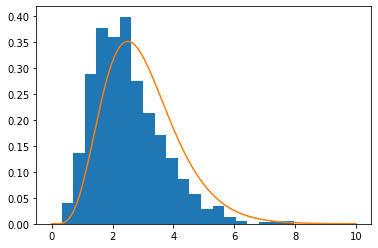

In [ ]:
plt.hist(lambda_mat[0], bins = 20, density = True)
x = np.linspace(0, 10, 1000)
y = scipy.stats.gamma.pdf(x, a = 6, scale = 0.5)
plt.plot(x, y)

In [ ]:
def check_post(row_ind):
  plt.hist(lambda_mat[row_ind], bins = 20, density = True)
  x = np.linspace(0, 10, 1000)
  y = scipy.stats.gamma.pdf(x, a = Y[row_ind] + 1, scale = 0.5) # here 'scale' refers to precision paramter, exactly the opposite!!
  plt.plot(x, y)

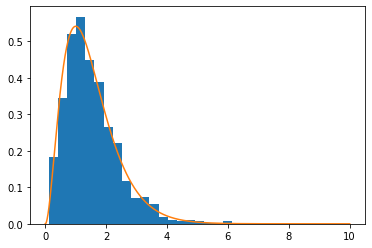

In [ ]:
check_post(98)

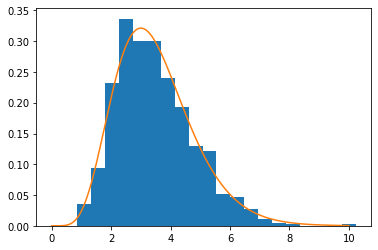

In [ ]:
check_post(97)

# Checking pedantic warning: Parameter has no priors (WARNING IS STUPID, actually everything works !!)

In [ ]:
test_code = """

data{
  real y;
  real mu_given;
}

parameters{
  real mu;
}

model{
  mu ~ normal(mu_given, 1);
  y ~ normal(mu, 1);
}

"""

In [ ]:
test_data = {'y':1, 'mu_given':-1}
posterior = stan.build(test_code, data = test_data)
fit = posterior.sample(num_chains = 5, num_samples = 1000)
df = fit.to_frame()
df.tail(2000).hist(column = 'mu')

NameError: ignored

In [ ]:
import os
print('Number of CPUs in the system: {}'.format(os.cpu_count()))

Number of CPUs in the system: 2


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
import psutil
psutil.cpu_count()

2